There are 497472 responses
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391
Percentage of each leading digit's occurrence (1 to 9):
Leading Digit 1: 0.24%
Leading Digit 2: 0.11%
Leading Digit 3: 0.12%
Leading Digit 4: 0.12%
Leading Digit 5: 0.11%
Leading Digit 6: 0.10%
Leading Digit 7: 0.09%
Leading Digit 8: 0.07%
Leading Digit 9: 0.05%
Observed Frequencies:
{'1': 0.2365781390711437, '2': 0.10547930335777692, '3': 0.1169412549852052, '4': 0.11802875337707448, '5': 0.10913177023028432, '6': 0.09709893220120931, '7': 0.09305448346841631, '8': 0.06992956387495175, '9': 0.05375779943393799}

Benford's Law Expected Proba

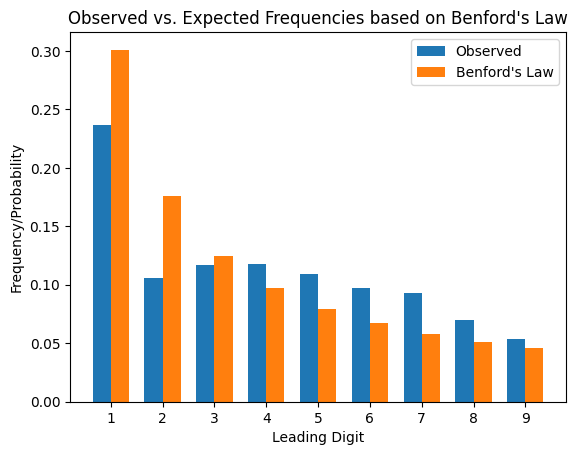

In [29]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math


df = pd.read_csv(io.BytesIO(open('stock prices.csv', 'rb').read()))

df.dataframeName = 'stock prices.csv'
nRow, nCol = df.shape
print(f'There are {nRow} responses')

print(df.head())

#We will be looking at the close price for these tickers.

df['close'] = df['close'].astype(str)

digitcount = {str(i): 0 for i in range(1, 10)}

leading_digit_count = {str(i): 0 for i in range(1, 10)}  # Initialize counts for digits 1 to 9

total_entries = 0

# Iterate through each row and count the occurrences of leading digits in the 'country_area_km2' column
for index, row in df.iterrows():
    first_digit = row['close'][0]  # Get the first character (leading digit)
    if first_digit.isdigit() and int(first_digit) in range(1, 10):
        leading_digit_count[first_digit] += 1
        total_entries += 1

# Calculate the percentage of each leading digit's occurrence
observed_frequencies = {digit: count / total_entries for digit, count in leading_digit_count.items()}

print("Percentage of each leading digit's occurrence (1 to 9):")
for digit, percentage in observed_frequencies.items():
    print(f"Leading Digit {digit}: {percentage:.2f}%")

# Benford's Law theoretical probabilities
benford_probabilities = {str(i): round(math.log10(1 + 1 / i), 3) for i in range(1, 10)}

# Display observed vs. expected frequencies
print("Observed Frequencies:")
print(observed_frequencies)
print("\nBenford's Law Expected Probabilities:")
print(benford_probabilities)

# Plotting the observed vs. expected frequencies
fig, ax = plt.subplots()
bar_width = 0.35
x = range(1, 10)

observed_bars = ax.bar(x, observed_frequencies.values(), bar_width, label='Observed')
benford_bars = ax.bar([i + bar_width for i in x], benford_probabilities.values(), bar_width, label="Benford's Law")

ax.set_xlabel('Leading Digit')
ax.set_ylabel('Frequency/Probability')
ax.set_title('Observed vs. Expected Frequencies based on Benford\'s Law')
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(observed_frequencies.keys())
ax.legend()

plt.show()














